In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from bayesfilt import KalmanFilter, UnscentedKalmanFilter, LinearObservationModel
from bayesfilt import ConstantVelocity1D, ConstantAcceleration1D

In [4]:
# generate noisy data
dt = 0.1
tlen = 60
ncycles = 4
t = np.linspace(0,tlen,int(tlen/dt)+1)
ytrue = np.array([np.sin(t*ncycles*2.*np.pi/tlen), np.cos(t*ncycles*2.*np.pi/tlen)*ncycles*2.*np.pi/tlen])
yobs = ytrue.copy()
yobs[0,:] += np.random.randn(t.size)*0.2
yobs[1,:] += np.random.randn(t.size)*0.1

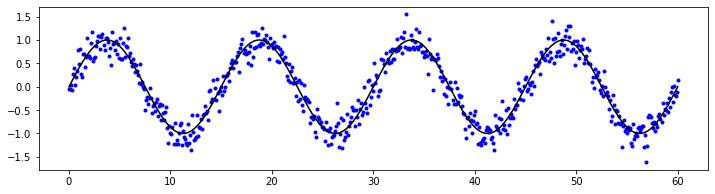

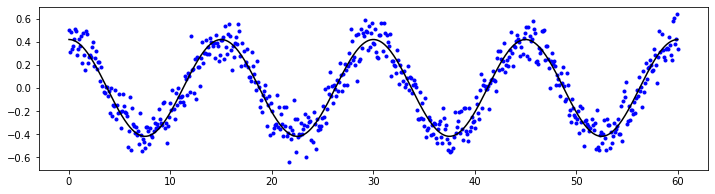

In [5]:
for i in range(yobs.shape[0]):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t,yobs[i,:], '.b')
    ax.plot(t,ytrue[i,:], '-k')

## CV1D

In [31]:
# constant velocity model
mm = ConstantVelocity1D()
dt = 0.05
mm.update(dt = dt, sigmas = [0.03])
om = LinearObservationModel(nx = mm.nx, observed = {0:0, 1:1})
om.update(R=np.diag([0.2, 0.1])**2)
start_x = [yobs[0,0], yobs[1,0]]
start_P = np.diag([0.2, 0.1])

In [32]:
# kalman filter
kf = KalmanFilter(nx = mm.nx, ny = om.ny , dt = dt)
kf.F = mm.F.copy()
kf.Q = mm.Q.copy()
kf.H = om.H.copy()
kf.R = om.R.copy()
kf.initiate_state(t0 = t[0], m0 = start_x, P0 = start_P)
kf.filter(t[1:], [ix for ix in yobs[:,1:].T])
kf.smoother()

In [33]:
# unscented kalman filter
ukf = UnscentedKalmanFilter(nx = mm.nx, ny = om.ny, dt = dt)
ukf.f = mm.f
ukf.Q = mm.Q.copy()
ukf.h = om.h
ukf.R = om.R.copy()
ukf.initiate_state(t0 = t[0], m0 = start_x, P0 = start_P)
ukf.filter(t[1:], [ix for ix in yobs[:,1:].T])
#ikf.smoother()

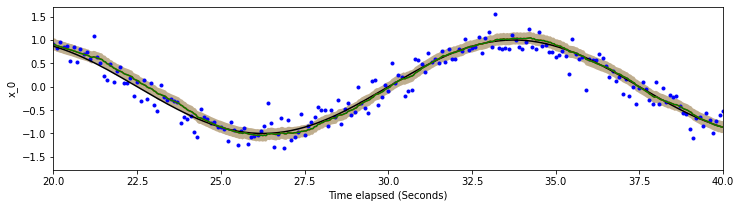

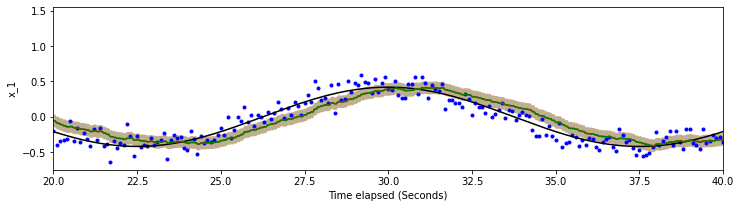

In [34]:
for i in range(kf.nx):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t, yobs[i,:], '.b')
    ax.plot(t, ytrue[i,:], '-k')
    kf.plot_state(ax, i, 'r', 'filter', linestyle='-')
    ukf.plot_state(ax, i, 'g', 'filter', linestyle='-')
    ax.set_xlim([20,40])

In [20]:
for i in range(2):
    print(np.allclose(kf.get_state_mean(i), ukf.get_state_mean(i)))

True
True


In [21]:
kf.get_state_mean(0) == ukf.get_state_mean(0)

array([ True, False,  True, ..., False, False, False])

## CA1D

In [24]:
# constant acceleration model
mm = ConstantAcceleration1D()
dt = 0.05
mm.update(dt = dt, sigmas = [0.03])
om = LinearObservationModel(nx = mm.nx, observed = {0:0, 1:1})
om.update(sigmas=[0.2, 0.1])
start_x = [yobs[0,0], yobs[1,0], 0.]
start_P = np.diag([0.2, 0.1, 0.1])

In [25]:
# kalman filter
kf = KalmanFilter(nx = mm.nx, ny = om.ny , dt = dt)
kf.F = mm.F.copy()
kf.Q = mm.Q.copy()
kf.H = om.H.copy()
kf.R = om.R.copy()
kf.initiate_state(t0 = t[0], m0 = start_x, P0 = start_P)
kf.filter(t[1:], [ix for ix in yobs[:,1:].T])
kf.smoother()

In [26]:
# unscented kalman filter
ukf = UnscentedKalmanFilter(nx = mm.nx, ny = om.ny, dt = dt)
ukf.f = mm.f
ukf.Q = mm.Q.copy()
ukf.h = om.h
ukf.R = om.R.copy()
ukf.initiate_state(t0 = t[0], m0 = start_x, P0 = start_P)
ukf.filter(t[1:], [ix for ix in yobs[:,1:].T])
#ikf.smoother()

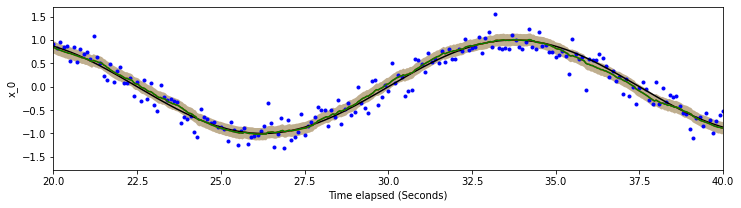

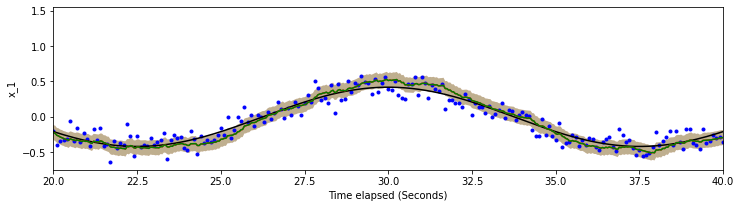

In [29]:
for k, v in om.observed.items():
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t, yobs[k,:], '.b')
    ax.plot(t, ytrue[k,:], '-k')
    kf.plot_state(ax, v, 'r', 'filter', linestyle='-')
    ukf.plot_state(ax, v, 'g', 'filter', linestyle='-')
    ax.set_xlim([20,40])

In [ ]:
for i in range(2):
    print(np.allclose(kf.get_state_mean(i), ukf.get_state_mean(i)))

In [ ]:
def this_f():
    return 10
    return 20

In [ ]:
this_f()

In [ ]:
np.array([[0]])